# Model Assertions

`Kang, Daniel, et al. "Model assertions for monitoring and improving ml models." Proceedings of Machine Learning and Systems 2 (2020): 481-496.`

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt

!apt install -y libboost-all-dev
!pip install -U pip
!pip install "pybind11[global]"

!pip install git+https://github.com/Koukyosyumei/AIJack

In [2]:
import cv2
import torch
from google.colab.patches import cv2_imshow

from aijack.defense.debugging.assertions import (
    MultiBoxAssertionError,
    assert_multibox,
)

In [3]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
img = cv2.imread("yolov5/data/images/bus.jpg")
result = model(img)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use

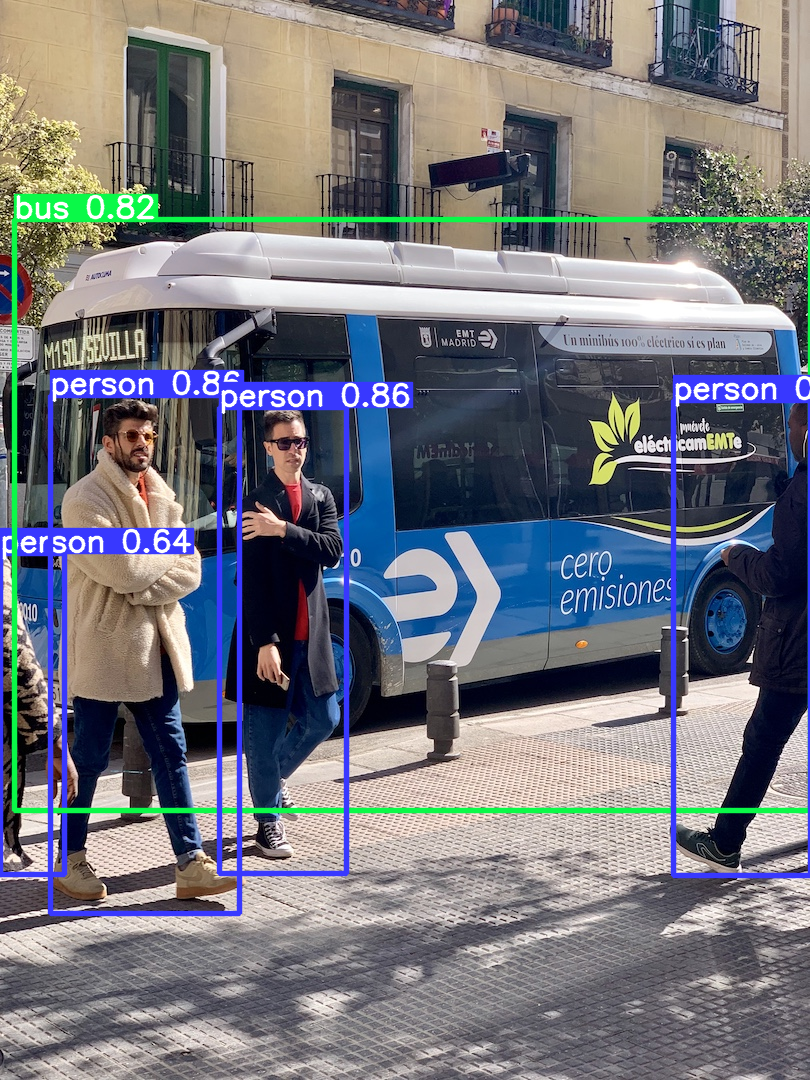

In [4]:
result.render()
cv2_imshow(result.ims[0])

In [5]:
obj = result.pandas().xyxy[0]
print(obj)

         xmin        ymin        xmax        ymax  confidence  class    name
0  219.176910  407.951538  346.656036  873.833130    0.864783      0  person
1   50.105759  395.405853  239.340012  913.149536    0.860630      0  person
2  673.475220  400.604767  810.000000  875.171875    0.849397      0  person
3   14.653461  219.916214  810.000000  810.014282    0.816330      5     bus
4    0.084969  553.378967   64.705879  874.105225    0.644387      0  person


In [7]:
boxes = obj[["xmin", "ymin", "xmax", "ymax"]].values.tolist()
assert_multibox(boxes)

MultiBoxAssertionError: ignored